In [ ]:
# Class creation
# Book Class
class Book:
  # Constructor
  def __init__(self,date,title,genre,type,rating,price,average_reading_time):
    # Unique identifier for class
    self.unique_id=id(self)
    self.date=date
    self.title=title
    self.genre=genre
    self.type=type
    self.rating=rating
    self.price=price
    self.average_reading_time=average_reading_time

  # Method to return string of all attribute values
  def __str__(self):
    book_string=str(self.unique_id)+','+str(self.date)+','+str(self.title)+','+str(self.genre)+','+str(self.type)+','+str(self.rating)+','+str(self.price)+','+str(self.average_reading_time)
    return book_string

# FictionBook class - Child class of Book
class FictionBook(Book):
  def __init__(self,date,title,genre,rating,price,average_reading_time):
    #Calling the constructor of parent class
    super().__init__(date,title,genre,'Fiction',rating,price,average_reading_time)

# NonFictionBook class - Child class of Book
class NonFictionBook(Book):
  def __init__(self,date,title,genre,rating,price,average_reading_time):
    super().__init__(date,title,genre,'Non-Fiction',rating,price,average_reading_time)

# MysteryBook class - Child class of FictionBook
class MysteryBook(FictionBook):
  def __init__(self,date,title,rating,price,average_reading_time):
    super().__init__(date,title,'MysteryBook',rating,price,average_reading_time)

# ScienceBook class - Child class of NonFictionBook
class ScienceBook(NonFictionBook):
  def __init__(self,date,title,rating,price,average_reading_time):
    super().__init__(date,title,'ScienceBook',rating,price,average_reading_time)

# BiographyBook class - Child class of NonFictionBook
class BiographyBook(NonFictionBook):
  def __init__(self,date,title,rating,price,average_reading_time):
    super().__init__(date,title,'BiographyBook',rating,price,average_reading_time)


In [ ]:
# Testing the classes created
ScienceBookBook= ScienceBook ("2022-10-16","The Selfish Gene", 3.0, 69.19, 38.00)
print(str(ScienceBookBook))

139135228722624,2022-10-16,The Selfish Gene,ScienceBook,Non-Fiction,3.0,69.19,38.0


In [ ]:
#This code block access the google drive to find the pickle file
#It will ask to sign in to google account and if the file is present in Gdrive it will access it

from google.colab import drive
drive.mount('/content/drive')

import shutil

# Define the source and destination file paths
source_file_path = '/content/drive/My Drive/Bookpkl638250301.dat'
destination_file_path = '/content/Bookpkl638250301.dat'

# Copy the file from Google Drive to Colab
shutil.copyfile(source_file_path, destination_file_path)

Mounted at /content/drive


'/content/Bookpkl638250301.dat'

In [ ]:
#Loading data from the pickle file and inserting into a csv file

import pickle

with open('Bookpkl638250301.dat','rb') as f:
  try:
    #Loading the data into a csv file
    with open('BooksData.csv','w') as b:
        b.write("unique_id,date,title,genre,type,rating,price,average_reading_time\n")
        books=pickle.load(f)
        for book in books:
          b.write(str(book))
          b.write('\n')
  except EOFError:
    pass

In [ ]:
# Reading data from the csv file into a pandas dataframe
import pandas as pd

books_data = pd.read_csv("BooksData.csv")
books_data


,unique_id,date,title,genre,type,rating,price,average_reading_time
0,132932533901184,2022-04-07,Gone Girl,MysteryBook,Fiction,2.0,65.63,36.30
1,132932533911360,2022-06-24,Steve Jobs,BiographyBook,Non-Fiction,2.0,63.10,32.63
2,132932533900704,2022-08-21,The Da Vinci Code,MysteryBook,Fiction,1.0,65.43,41.62
3,132932533895568,2022-07-08,The Da Vinci Code,MysteryBook,Fiction,3.0,64.01,40.86
4,132932533907520,2022-12-23,Gone Girl,MysteryBook,Fiction,2.0,60.26,37.40
...,...,...,...,...,...,...,...,...
9995,132932530459776,2022-07-17,The Da Vinci Code,MysteryBook,Fiction,3.0,69.89,48.60
9996,132932530459824,2022-09-29,The Da Vinci Code,MysteryBook,Fiction,2.0,69.36,45.26
9997,132932530459872,2022-06-20,Sapiens,ScienceBook,Non-Fiction,3.0,67.76,40.51
9998,132932530459920,2022-08-24,Sapiens,ScienceBook,Non-Fiction,1.0,64.24,47.53


In [ ]:
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             10000 non-null  int64  
 1   date                  9551 non-null   object 
 2   title                 10000 non-null  object 
 3   genre                 10000 non-null  object 
 4   type                  10000 non-null  object 
 5   rating                9580 non-null   float64
 6   price                 9609 non-null   float64
 7   average_reading_time  9595 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 625.1+ KB


**Description of Dataset**:  The dataset contains details regarding books such as their title, rating, price, genre, type and date of purchase. The datatypes in the dataset are string, float and date. There are a total of 10000 entries in the dataset. The dataset contains books of 3 different genres, 2 different types and 9 different titles.

In [ ]:
#Identifying NA values in the dataset
books_data.isna().sum()

unique_id                 0
date                    449
title                     0
genre                     0
type                      0
rating                  420
price                   391
average_reading_time    405
dtype: int64

**Dealing with missing values** : The date, rating, price and average_reading_time contains missing values. They were replaced with median values based on their book titles for columns rating, price and average_reading_time. NA values for date column were replaced with mode values based on their book titles.

In [ ]:
#Data cleaning
titles = books_data['title'].unique()
# Filling NA values with median values based on their book titles for columns rating, price and average_reading_time
cols=['rating','price','average_reading_time']
for column in cols:
    books_data[column] = books_data.groupby('title')[column].transform(lambda x: x.fillna(x.median()))

#Filling NA values for date column with mode values based on their book titles
books_data['date'] = books_data.groupby('title')['date'].transform(lambda x: x.fillna(x.mode().iloc[0]))

books_data

,unique_id,date,title,genre,type,rating,price,average_reading_time
0,132932533901184,2022-04-07,Gone Girl,MysteryBook,Fiction,2.0,65.63,36.30
1,132932533911360,2022-06-24,Steve Jobs,BiographyBook,Non-Fiction,2.0,63.10,32.63
2,132932533900704,2022-08-21,The Da Vinci Code,MysteryBook,Fiction,1.0,65.43,41.62
3,132932533895568,2022-07-08,The Da Vinci Code,MysteryBook,Fiction,3.0,64.01,40.86
4,132932533907520,2022-12-23,Gone Girl,MysteryBook,Fiction,2.0,60.26,37.40
...,...,...,...,...,...,...,...,...
9995,132932530459776,2022-07-17,The Da Vinci Code,MysteryBook,Fiction,3.0,69.89,48.60
9996,132932530459824,2022-09-29,The Da Vinci Code,MysteryBook,Fiction,2.0,69.36,45.26
9997,132932530459872,2022-06-20,Sapiens,ScienceBook,Non-Fiction,3.0,67.76,40.51
9998,132932530459920,2022-08-24,Sapiens,ScienceBook,Non-Fiction,1.0,64.24,47.53


In [ ]:
books_data.isna().sum()

unique_id               0
date                    0
title                   0
genre                   0
type                    0
rating                  0
price                   0
average_reading_time    0
dtype: int64

# 1. Bar Graph

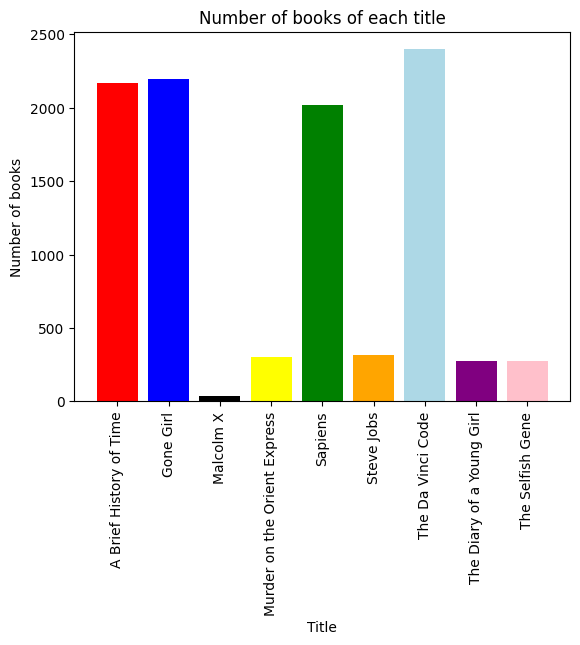

In [ ]:
# Bar graph
import matplotlib.pyplot as plt

title_books=books_data.groupby('title').size()
titles.sort()
#Plotting number of books for each title
plt.bar(titles, title_books.tolist(),color=['red','blue','black','yellow','green','orange','lightblue','purple','pink'])

# Add title and labels
plt.title('Number of books of each title')
plt.xlabel('Title')
plt.ylabel('Number of books')
plt.xticks(rotation=90)

# Show the plot
plt.show()

**Conclusion based on bar graph** : Among the books in the dataset, 'The Da Vinci Code' is the most popular choice, whereas 'Malcolm X' appears to be less frequently read compared to other titles.

Further analysis reveals that 'A Brief History of Time', 'Gone Girl', and 'Sapiens' also stand out as top-selling books.

However, books such as 'Murder on the Orient Express', 'Steve Jobs', and 'The Diary of a Young Girl' seem to have lower sales in comparison to other books.

# 2. Pie Chart

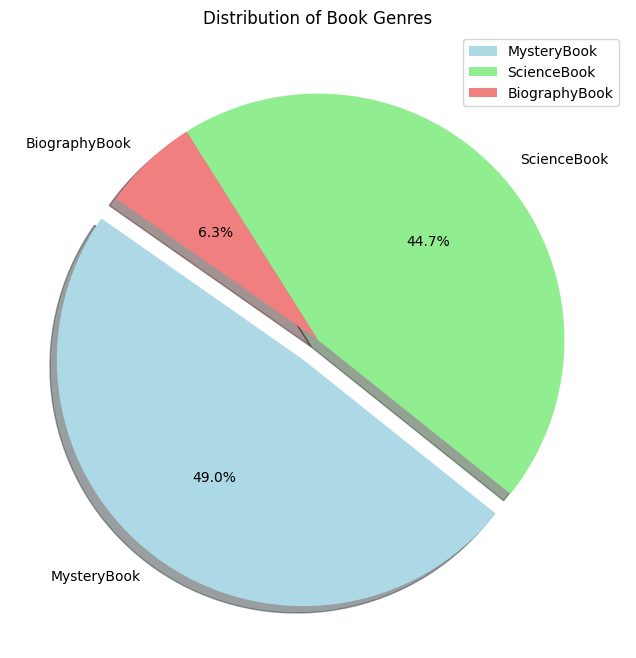

In [ ]:
import matplotlib.pyplot as plt

# Calculate the distribution of book genres
genre_distribution = books_data['genre'].value_counts()

# Define explode values
explode = [0.1 if genre == 'MysteryBook' else 0 for genre in genre_distribution.index]

# Define colors
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(genre_distribution, labels=genre_distribution.index, autopct='%1.1f%%', startangle=145, explode=explode, colors=colors, shadow=True)
plt.title('Distribution of Book Genres')
plt.legend(loc="upper right")
plt.show()

**Conclusion from Pie Chart**: It is evident that Mysterybook and Sciencebook genres constitute the majority, accounting for 93.7% of the total distribution. This indicates a significant preference among readers towards mystery and science-related books.

# 3. Box plot

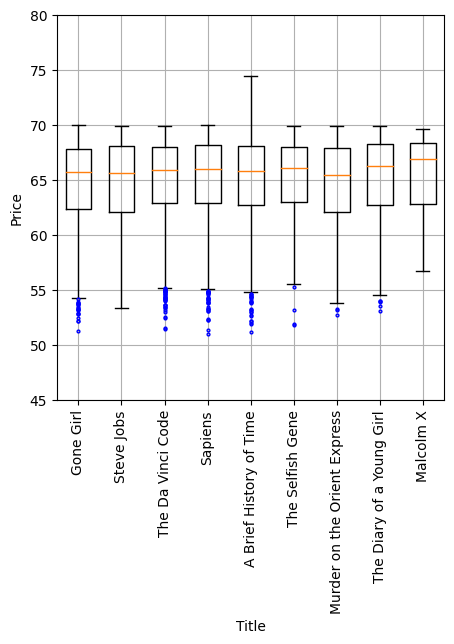

In [ ]:
#Box plots
titles = books_data['title'].unique()
flierprops = dict(marker='o', markersize=2, markeredgecolor='b')
plt.figure(figsize=(5, 5))
plt.ylim(45,80)
for i in range(0,len(titles)):
  plt.boxplot(books_data[(books_data['title']==titles[i])]['price'], positions=[i+1], widths=0.6, flierprops=flierprops, whis=1.5)

plt.xticks(range(1,len(titles)+1), titles)
plt.xticks(rotation=90)
plt.xlabel('Title')
plt.ylabel('Price')
# # Show plot
plt.grid(True)
plt.show()

**Conclusion based on Box plot**: The box plots show a consistent trend across all books, with nearly the same median prices for all of them.The box plots shows that the price distribution for all the books is left skewed. Additionally, outliers extend beyond the lower whisker, reflecting instances where book prices fall significantly below the median.

In summary, the majority of books in the dataset are priced within a narrow range, predominantly between 62 to 68 units, suggesting a consistent pricing pattern among the book titles.

# 4. Histogram

65.11670177024538
65.93


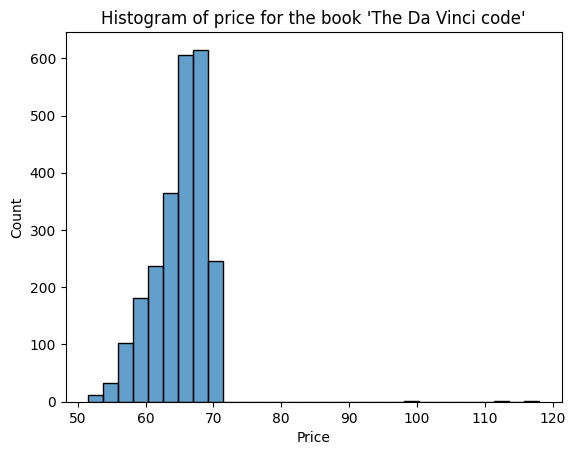

In [ ]:
import numpy as np
import seaborn as sb

price_data=books_data.loc[books_data['title'] == 'The Da Vinci Code']
sb.histplot(data=price_data,x='price', bins=30, alpha = 0.7)
plt.xlabel('Price')
plt.title('Histogram of price for the book \'The Da Vinci code\'')

print(price_data['price'].mean())
print(price_data['price'].median())

**Conclusion** from this graph shows that the price for the book **The Da Vinci Code** is skewed to the right side, with the median price greater than the average price. It can also be observed that the price range lies mostly between \$60 to \$70. We can also see that there are some outlier data, between \$100 and $120

# 5. Heat Map

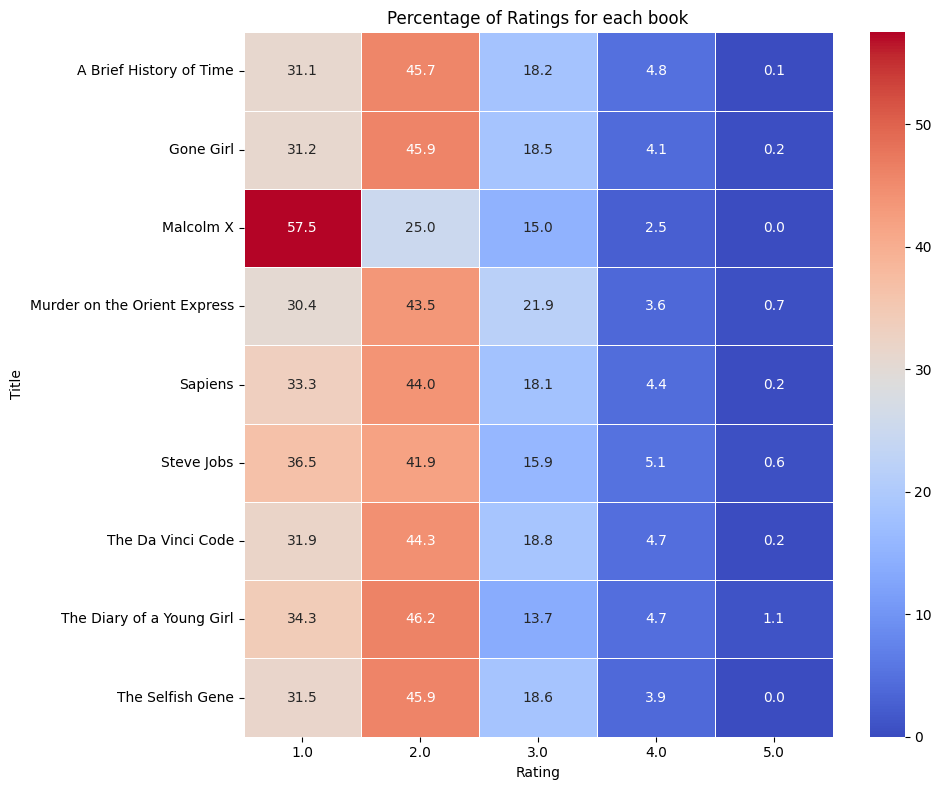

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Grouping data based on title and then by rating for each title
heatmap_data = books_data.groupby(['title', 'rating']).size().unstack(fill_value=0)

# Summing the total ratings for each title
total_counts = heatmap_data.sum(axis=1)

# Calculate percentages of ratings after dividing by total ratings
heatmap_data = heatmap_data.div(total_counts, axis=0) * 100

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title('Percentage of Ratings for each book')
plt.xlabel('Rating')
plt.ylabel('Title')
plt.tight_layout()
plt.show()

**Conclusion based on Heat Map**: The heatmap  represents the distribution of ratings percentages across different book titles.

It is observed that 'Malcolm X' exhibits the lowest rating among the titles, with approximately 57.5% of its total ratings allocated a rating score of 1. The remaining books demonstrate a consistent trend, with approximately 45% of their ratings assigned a score of 2, and around 35% receiving a rating score of 1.

These findings provide valuable insights into the rating distribution across various book titles, highlighting 'Malcolm X' as the least favored book among the dataset analyzed.

# 6. Scatter Plot

In [ ]:
import pandas as pd


books_data['date'] = pd.to_datetime(books_data['date'])


books_data['month'] = books_data['date'].dt.strftime('%Y-%m')


books_data['quarter'] = books_data['date'].dt.to_period('Q')

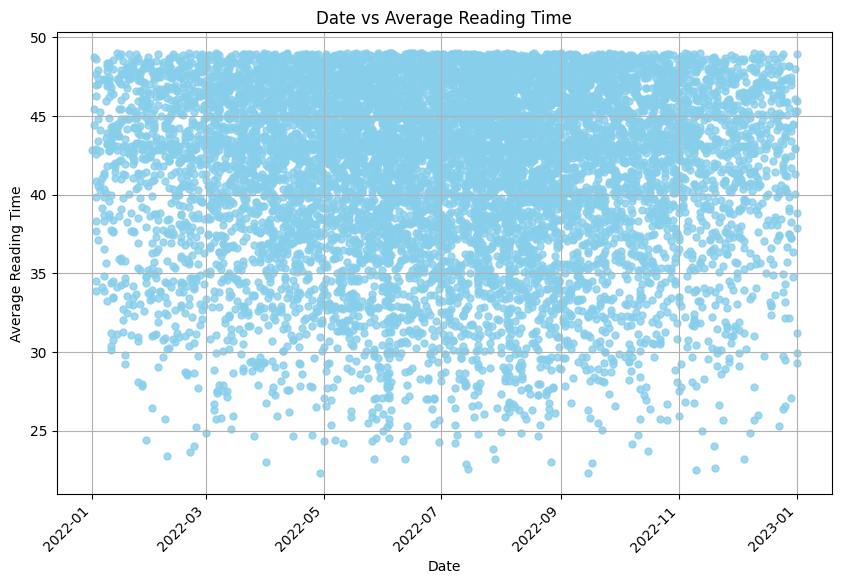

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of date versus average reading time
plt.figure(figsize=(10, 6))
plt.scatter(books_data['date'], books_data['average_reading_time'], color='skyblue', alpha=0.8, s=25)


plt.title('Date vs Average Reading Time')
plt.xlabel('Date')
plt.ylabel('Average Reading Time')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)


plt.show()


**Conclusion based on scatter plot**: There does not seem to be a significant correlation between the time of year(date) and the average reading time.

# 7. Line Graph

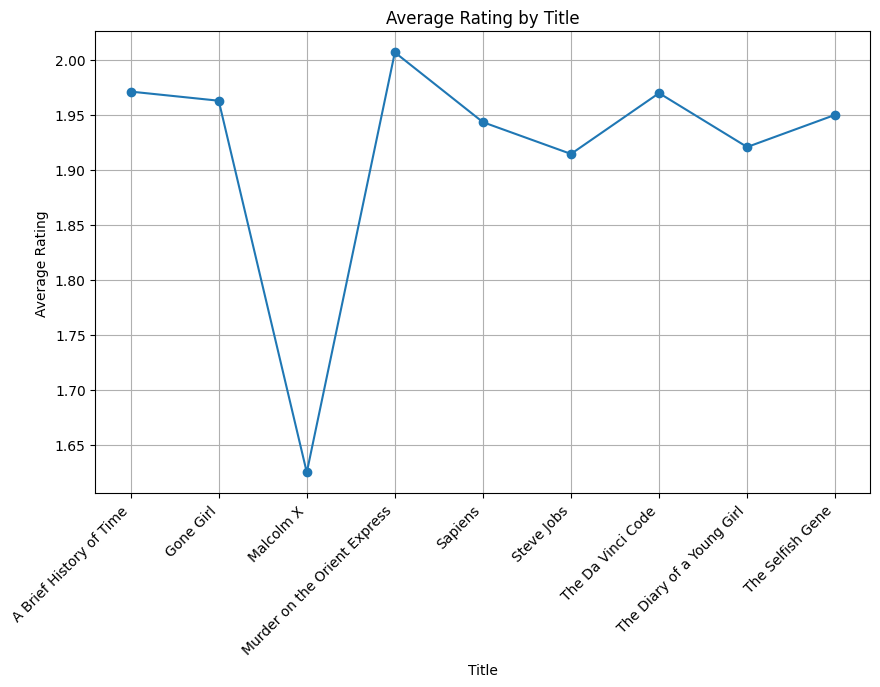

In [ ]:
import matplotlib.pyplot as plt

# Aggregate data to calculate average rating for each title
avg_rating_by_title = books_data.groupby('title')['rating'].mean()

# Plot the data as a line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_rating_by_title.index, avg_rating_by_title.values, marker='o', linestyle='-')
plt.title('Average Rating by Title')
plt.xlabel('Title')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

**Conclusion based on line chart**: Malcolm X has a signifcantly lower average rating compared to the other books in the dataset, indicating poor reception by its readers. In contrast, Murder on the Orient Express has the highest average rating, suggesting strong satisfaction from readers. This data can help to understand reader engagement across literary works.

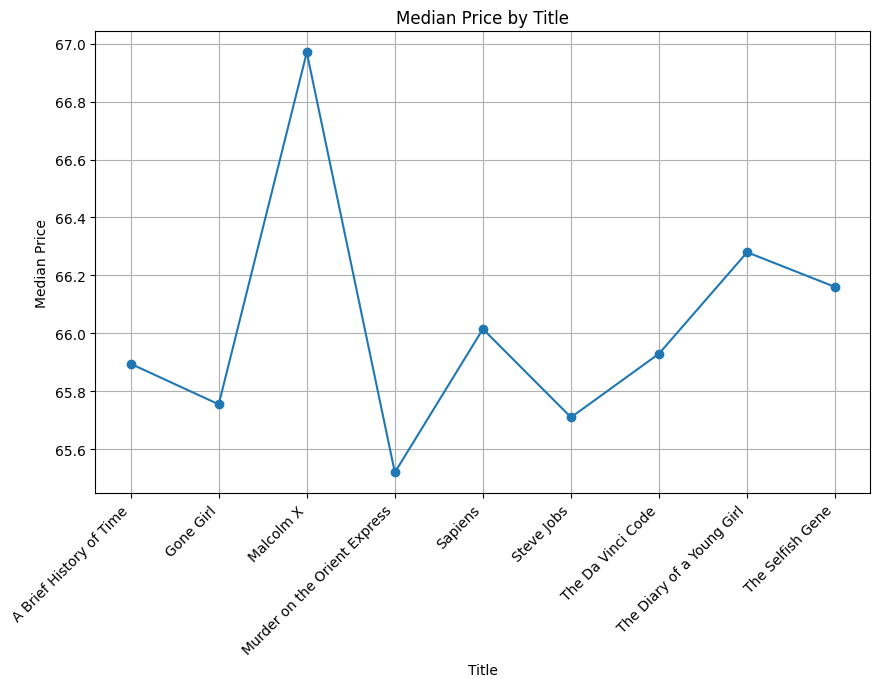

In [ ]:
import matplotlib.pyplot as plt

# Aggregate data to calculate average rating for each title
avg_rating_by_title = books_data.groupby('title')['price'].median()

# Plot the data as a line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_rating_by_title.index, avg_rating_by_title.values, marker='o', linestyle='-')
plt.title('Median Price by Title')
plt.xlabel('Title')
plt.ylabel('Median Price')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

**Conclusion based on line chart**: Murder on the Orient Express has the lowest median price compared to the other books in the dataset. Also, we can see that Malcolm X has the highest median price which is also not way off from the lowest price in this chart.

Text(0.5, 1.0, "Histogram of rating for the book 'The Da Vinci Code'")

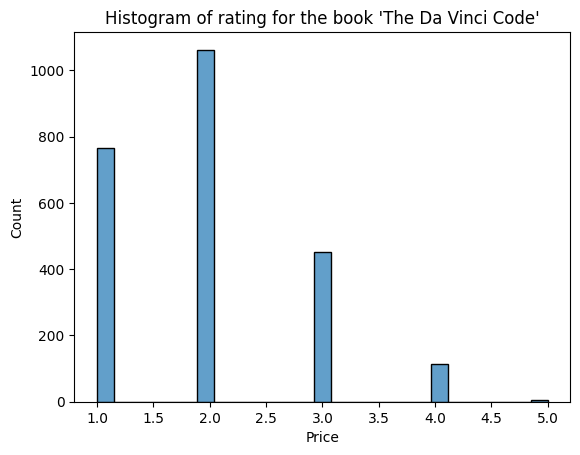

In [ ]:
rating_data=books_data.loc[books_data['title'] == 'The Da Vinci Code']
sb.histplot(data=rating_data,x='rating', alpha = 0.7)
plt.xlabel('Price')
plt.title('Histogram of rating for the book \'The Da Vinci Code\'')

**Conclusion** - continuing to the line chart of average rating, we can see that the book The Da Vinci Code has similar average rating to Murder on the Orient Express but The Da Vinci Code has more number of ratings. This makes 'The Da Vinci Code' favorite to most audiences.

**Conclusion**

- Most read book: **The Da Vinci Code**
- Overall Favorite - The **Da Vinci Code** - more number of ratings and average is slightly less than **Murder on the Orient Express**
- Cheapest book: **Murder on the Orient Express**


**Recommendation** :

1.   More data regarding 'Malcolm X' book could help draw better insights in future. Since there are only around 40 books of Malcolm X whereas there are about 400 to 2000 books for other titles.
2.   We can delete some far outliers from the dataset which can also help draw better insights based on the average of parameters.
3. Additional information regarding reader demographics and book length can help understand reader preferences and their rating behaviour.
